In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
using JSON

cross_validation_best_key_Jan_AM = readall("../temp_files/cross_validation_best_key_Jan_AM.json")
cross_validation_best_key_Jan_AM = JSON.parse(cross_validation_best_key_Jan_AM)

cross_validation_best_key_Jan_MD = readall("../temp_files/cross_validation_best_key_Jan_MD.json")
cross_validation_best_key_Jan_MD = JSON.parse(cross_validation_best_key_Jan_MD)

cross_validation_best_key_Jan_PM = readall("../temp_files/cross_validation_best_key_Jan_PM.json")
cross_validation_best_key_Jan_PM = JSON.parse(cross_validation_best_key_Jan_PM)

cross_validation_best_key_Jan_NT = readall("../temp_files/cross_validation_best_key_Jan_NT.json")
cross_validation_best_key_Jan_NT = JSON.parse(cross_validation_best_key_Jan_NT)

cross_validation_best_key_Jan_weekend = readall("../temp_files/cross_validation_best_key_Jan_weekend.json")
cross_validation_best_key_Jan_weekend = JSON.parse(cross_validation_best_key_Jan_weekend)

"(6,0.5,10000.0,3)"

In [3]:
coeffs_dict_Jan_AM = readall("../temp_files/coeffs_dict_Jan_AM.json")
coeffs_dict_Jan_AM = JSON.parse(coeffs_dict_Jan_AM)

coeffs_dict_Jan_MD = readall("../temp_files/coeffs_dict_Jan_MD.json")
coeffs_dict_Jan_MD = JSON.parse(coeffs_dict_Jan_MD)

coeffs_dict_Jan_PM = readall("../temp_files/coeffs_dict_Jan_PM.json")
coeffs_dict_Jan_PM = JSON.parse(coeffs_dict_Jan_PM)

coeffs_dict_Jan_NT = readall("../temp_files/coeffs_dict_Jan_NT.json")
coeffs_dict_Jan_NT = JSON.parse(coeffs_dict_Jan_NT)

coeffs_dict_Jan_weekend = readall("../temp_files/coeffs_dict_Jan_weekend.json")
coeffs_dict_Jan_weekend = JSON.parse(coeffs_dict_Jan_weekend)


coeffs_best_Jan_AM = coeffs_dict_Jan_AM[cross_validation_best_key_Jan_AM]
coeffs_best_Jan_MD = coeffs_dict_Jan_MD[cross_validation_best_key_Jan_MD]
coeffs_best_Jan_PM = coeffs_dict_Jan_PM[cross_validation_best_key_Jan_PM]
coeffs_best_Jan_NT = coeffs_dict_Jan_NT[cross_validation_best_key_Jan_NT]
coeffs_best_Jan_weekend = coeffs_dict_Jan_weekend[cross_validation_best_key_Jan_weekend]

7-element Array{Any,1}:
  1.0       
  0.00358791
  0.0139537 
 -0.00465429
  0.0259172 
 -0.0124903 
  0.00440058

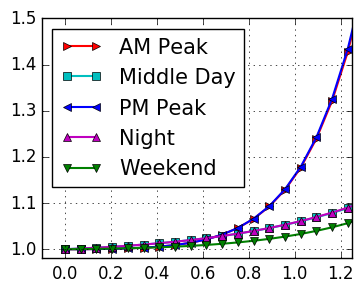

In [11]:
using PyPlot

xs = linspace(0, 1.3, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Jan_AM = map(x->polyEval(coeffs_best_Jan_AM, x), xs)
ys_Jan_MD = map(x->polyEval(coeffs_best_Jan_MD, x), xs)
ys_Jan_PM = map(x->polyEval(coeffs_best_Jan_PM, x), xs)
ys_Jan_NT = map(x->polyEval(coeffs_best_Jan_NT, x), xs)
ys_Jan_weekend = map(x->polyEval(coeffs_best_Jan_weekend, x), xs)

fig = figure(figsize=(4,3),)

plot(xs, ys_Jan_AM, ">-r", label="AM Peak", linewidth=1.5)
plot(xs, ys_Jan_MD, "s-c", label="Middle Day", linewidth=1.5)
plot(xs, ys_Jan_PM, "<-b", label="PM Peak", linewidth=1.5)
plot(xs, ys_Jan_NT, "^-m", label="Night", linewidth=1.5)
plot(xs, ys_Jan_weekend, "v-g", label="Weekend", linewidth=1.5)

legend(loc="upper left", fontsize=15) 

grid("on")
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = ["family"=>"serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>15]
# xlabel("Scaled Flow", fontdict=font1)
# ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Jan.pdf")

In [5]:
cross_validation_best_key_Jan_MD

"(6,1.5,10000.0,1)"

In [6]:
outfile = open("../temp_files/cost_func_Jan.txt", "w")

write(outfile,"coeffs_Jan_AM: $(coeffs_best_Jan_AM) \n \
coeffs_Jan_MD: $(coeffs_best_Jan_MD) \n \
coeffs_Jan_PM: $(coeffs_best_Jan_PM) \n \
coeffs_Jan_NT: $(coeffs_best_Jan_NT) \n \
coeffs_Jan_weekend: $(coeffs_best_Jan_weekend) \n")

close(outfile)